In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy,Recall,Precision,AUC
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.preprocessing import image

In [ ]:
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
!nvidia-smi

Tue May 23 07:33:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |  14541MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/Alzhiemer/

/content/gdrive/MyDrive/Alzhiemer


In [ ]:
!unzip datasettt.zip

Streaming output truncated to the last 5000 lines.
 extracting: test/Very_Mild_Demented/verymild_96_jpg.rf.ccf4ed215f7c228200fb5e33089f022b.jpg  
 extracting: test/Very_Mild_Demented/verymild_970_jpg.rf.08ad0d93774f5e1ce3b43f1d3719a049.jpg  
 extracting: test/Very_Mild_Demented/verymild_974_jpg.rf.691ae69a9042109db40682095647bd9e.jpg  
 extracting: test/Very_Mild_Demented/verymild_975_jpg.rf.e03d33edcf1d3319c690f187bfe3ccb2.jpg  
 extracting: test/Very_Mild_Demented/verymild_979_jpg.rf.7091982184c2c91ecd08b7043cc69a73.jpg  
 extracting: test/Very_Mild_Demented/verymild_982_jpg.rf.d24932c9007dc08a8482185b794f3bdc.jpg  
 extracting: test/Very_Mild_Demented/verymild_983_jpg.rf.e64c109352ce391b7f90b04e83b67f79.jpg  
 extracting: test/Very_Mild_Demented/verymild_99_jpg.rf.a8d9bc996344c02365ddecdc4f3249c0.jpg  
   creating: train/
   creating: train/Mild_Demented/
 extracting: train/Mild_Demented/mild_101_jpg.rf.d9421c37d51e570905a3f111b8a3e234.jpg  
 extracting: train/Mild_Demented/mild_102

In [ ]:
train_image=[]
y_train=[]
test_image=[]
y_test=[]
gr_shape=(176,176,1)
img_shape = (176,176,3)

In [ ]:
train_dir = "/content/gdrive/MyDrive/Alzhiemer/train"
test_dir = "/content/gdrive/MyDrive/Alzhiemer/test"

In [ ]:
def rgb2gray(rgb):
    rgb= np.asarray(rgb)
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
Name = "alzh"

In [ ]:
os.listdir(train_dir)

['Non_Demented', 'Very_Mild_Demented', 'Mild_Demented', 'Moderate_Demented']

In [ ]:
labels = []
for i in os.listdir():
  labels.append(i)

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{value}")
    
y_train = []

for key,value in labels.items():
  y_train.append(value)

Label Mappings for classes present in the training and validation datasets

Mild_Demented
Moderate_Demented
Non_Demented
Very_Mild_Demented


In [ ]:
y_train
y_train = np.asarray(y_train)
hot = LabelEncoder()
y_encoded = hot.fit_transform(y_train)
print(y_train.shape)

(4,)


In [ ]:
for dirname in os.listdir(train_dir):
        for filename in glob(train_dir+'/'+dirname+'/*.jpg'):
             img = image.load_img(filename,target_size=img_shape)
             img = rgb2gray(img)
             img=img.reshape(gr_shape)
             train_image.append(img)
             y_train.append(dirname)

In [ ]:
y_train

['Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented',
 'Non_Demented

In [ ]:
x_train = np.array(train_image)
y_train = np.asarray(y_train)
hot = LabelEncoder()
y_encoded = hot.fit_transform(y_train)
y_train=to_categorical(y_encoded)
train_image=[]
print(x_train.shape)
print(y_train.shape)

(4987, 176, 176, 1)
(4987, 4)


In [ ]:
for dirname in os.listdir(test_dir):
        for filename in glob(test_dir+'/'+dirname+'/*.jpg'):
             img = image.load_img(filename,target_size=img_shape)
             img = rgb2gray(img)
             img=img.reshape(gr_shape)
             test_image.append(img)
             y_test.append(dirname)
x_test = np.array(test_image)
y_test = np.asarray(y_test)
hot = LabelEncoder()
y_encoded = hot.fit_transform(y_test)
y_test=to_categorical(y_encoded)
test_image=[]
print(x_test.shape)
print(y_test.shape)

(2124, 176, 176, 1)
(2124, 4)


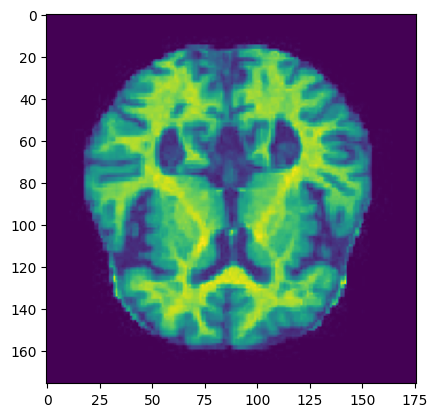

In [ ]:
plt.imshow(img)

In [ ]:
def fsblock(inp,filters):

    x = DepthwiseConv2D( kernel_size=7,padding='same',groups=filters)(inp)
    x = layers.LayerNormalization()(x)
    x = Conv2D(filters*4, kernel_size=1, padding="valid")(x)
    x = layers.Activation('gelu')(x)
    x = Conv2D(filters,kernel_size=1, padding='valid')(x)
    
    
    y = Conv2D(filters,1,activation="relu", padding='same')(inp)
    y = Conv2D(filters,3,activation="relu", padding='same')(y)
    y = Dropout(0.25)(y)
    
    output1 = layers.add([x,y])
    output1 = BatchNormalization(axis=1)(output1)
    output1 = layers.MaxPooling2D(2)(output1)
    return output1

In [ ]:
inputs = keras.Input(shape=(176,176,1), name="img")

bl0=fsblock(inputs,32)
bl1=fsblock(bl0,64)
bl2=fsblock(bl1,128)
bl3 = fsblock(bl2,128)
bl4 = fsblock(bl3,256)
y = Dropout(0.25)(bl4)
y = layers.GlobalAveragePooling2D()(y)
y = Dense(256, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(128, activation='relu')(y)
y = Dropout(0.5)(y)
outputs=Dense(4, activation='softmax')(y)
model = keras.Model(inputs, outputs, name="alzh")
print(model.summary())

Model: "alzh"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 176, 176, 1  0           []                               
                                )]                                                                
                                                                                                  
 depthwise_conv2d_1 (DepthwiseC  (None, 176, 176, 1)  50         ['img[0][0]']                    
 onv2D)                                                                                           
                                                                                                  
 layer_normalization (LayerNorm  (None, 176, 176, 1)  2          ['depthwise_conv2d_1[0][0]']     
 alization)                                                                                    

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(),  loss=keras.losses.CategoricalCrossentropy() , metrics=['acc',Recall(),Precision(),AUC()])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/100
78/78 [==============================] - 126s 1s/step - loss: 1.4460 - acc: 0.3116 - recall: 0.0465 - precision: 0.3152 - auc: 0.5715 - val_loss: 1.2757 - val_acc: 0.4247 - val_recall: 0.0099 - val_precision: 0.4468 - val_auc: 0.6947
Epoch 2/100
78/78 [==============================] - 78s 1000ms/step - loss: 1.2058 - acc: 0.4381 - recall: 0.1358 - precision: 0.4924 - auc: 0.7217 - val_loss: 1.1216 - val_acc: 0.4619 - val_recall: 0.0899 - val_precision: 0.5204 - val_auc: 0.7520
Epoch 3/100
78/78 [==============================] - 88s 1s/step - loss: 1.0433 - acc: 0.4961 - recall: 0.2932 - precision: 0.5563 - auc: 0.7919 - val_loss: 0.9714 - val_acc: 0.5000 - val_recall: 0.3908 - val_precision: 0.5689 - val_auc: 0.8181
Epoch 4/100
78/78 [==============================] - 78s 1s/step - loss: 0.9872 - acc: 0.4989 - recall: 0.3311 - precision: 0.5805 - auc: 0.8110 - val_loss: 1.0530 - val_acc: 0.4755 - val_recall: 0.2029 - val_precision: 0.6237 - val_auc: 0.7924
Epoch 5/100
78/

In [ ]:
y_pred = model.predict(x_test)

67/67 [==============================] - 10s 155ms/step


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have obtained y_pred_labels and y_true_labels as mentioned before

# Generate the classification report
report = classification_report(y_true_labels, y_pred_labels)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       554
           1       0.97      1.00      0.98       405
           2       0.90      0.92      0.91       712
           3       0.74      0.82      0.78       453

    accuracy                           0.89      2124
   macro avg       0.90      0.90      0.89      2124
weighted avg       0.90      0.89      0.89      2124

